## 09: Вспомогательные функции — загрузка, визуализация зависимости и Спирмен

Файл содержит:
- загрузку данных из БД;
- функцию визуализации зависимости признака от целевой `corrosion_rate`;
- функцию расчёта Спирмена для списка признаков.


In [2]:
# Импорты и загрузка данных
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if '../src' not in sys.path:
    sys.path.append('../src')
from database import load_corrosion_data_new as load_data
from analysis import AdvancedCorrosionAnalyzer


In [3]:
# Настройки
sns.set(style='whitegrid')
TARGET = 'worst_corrosion_rate_mm_per_year'

# Загрузка
DF = load_data()
assert TARGET in DF.columns, 'В данных отсутствует corrosion_rate_mm_per_year'

print(f"Данные: {len(DF):,} строк, {len(DF.columns)} колонок")
print('Колонки:')
print(sorted(DF.columns.tolist()))

Данные: 143,059 строк, 45 колонок
Колонки:
['ammonia_content', 'avg_corrosion_rate_mm_per_year', 'chloride_aggressiveness', 'chlorine_content', 'co2_content', 'component_type_id', 'component_type_name', 'contour', 'corrosion_aggressiveness_index', 'corrosion_inhibitor_content', 'corrosion_protection_index', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'equipment', 'equipment_age_years', 'h2s_aggressiveness_index', 'h2s_content', 'h2s_water_ratio', 'hydrochloric_acid_content', 'inner_diameter', 'installation', 'material_code', 'material_resistance_score', 'material_type', 'measurement_date', 'measurement_points_in_section', 'min_corrosion_rate_mm_per_year', 'nominal_thickness_mmc', 'operating_pressure', 'operating_temperature', 'outer_diameter', 'oxygen_content', 'pitting_corrosion_index', 'section_number', 'stress_corrosion_index', 'tmin_mmc', 'total_acidity_index', 'total_acids', 'total_chlorine_compounds', 'total_sulfur_compounds', 'underdeposit_corrosion_index', 'wall_thic

In [6]:
# Фильтрация по конкретной установке
INSTALLATION_FILTER = 'KK-2'
DF = DF[DF['installation'] == INSTALLATION_FILTER]

print(f"После фильтрации по '{INSTALLATION_FILTER}': {len(DF):,} строк")

После фильтрации по 'KK-2': 11,465 строк


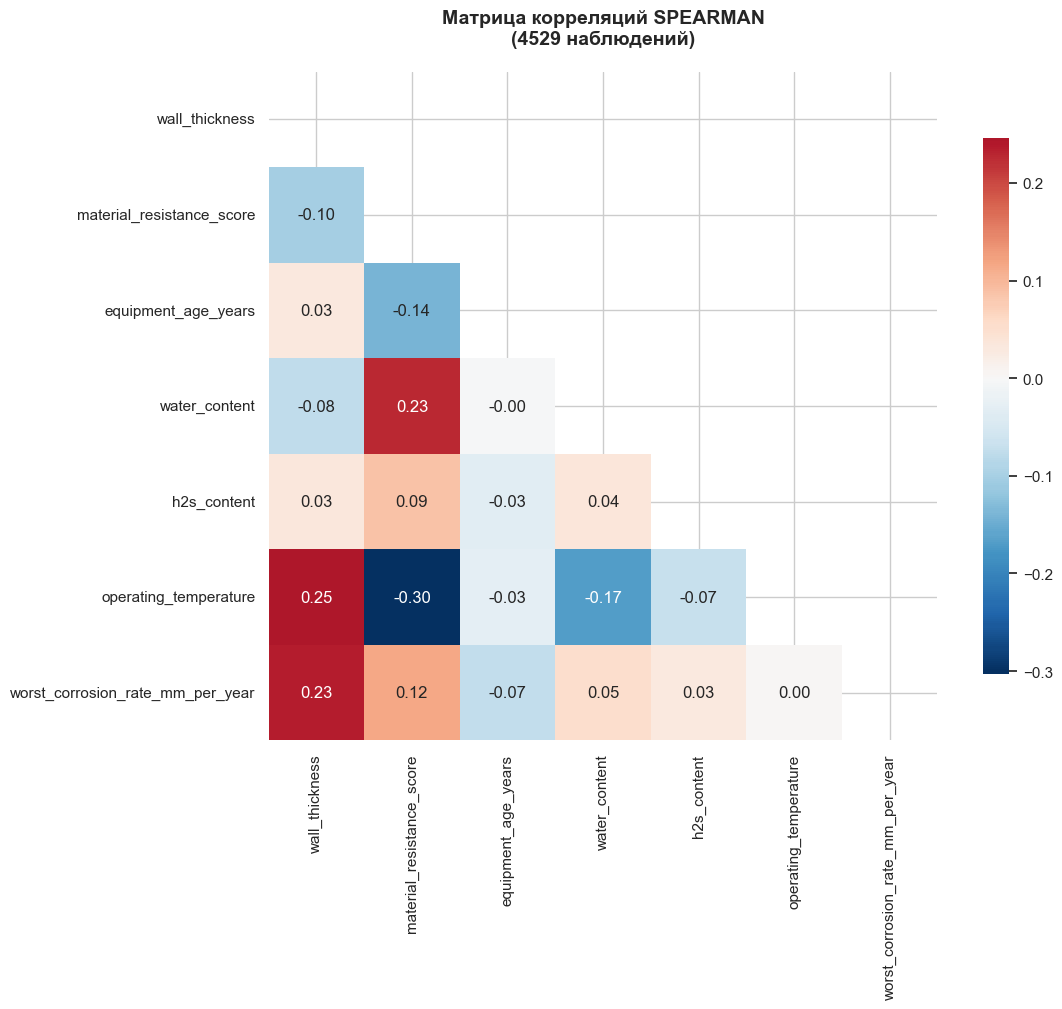

ТОП-6 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ SPEARMAN

📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ (p < 0.05):
  wall_thickness                 | r =   0.235 *** 🡅
  material_resistance_score      | r =   0.115 *** 🡅
  equipment_age_years            | r =  -0.074 *** 🡇
  water_content                  | r =   0.055 *** 🡅
  h2s_content                    | r =   0.029 * 🡅

📊 Статистика:
   Всего значимых корреляций: 5
   Максимальная корреляция: 0.235
   Минимальная корреляция: 0.003


In [11]:
# 1. Инициализация с любыми данными
analyzer = AdvancedCorrosionAnalyzer(DF)

# 2. Установка целевой переменной
analyzer.set_target('worst_corrosion_rate_mm_per_year')

# 3. Анализ корреляций для конкретных колонок
features_to_analyze = ['h2s_content', 'water_content', 'operating_temperature', 
                      'material_resistance_score', 'wall_thickness', 'equipment_age_years']

correlations = analyzer.analyze_correlations(
    feature_columns=features_to_analyze,
    method='spearman',
    top_k=15,
    plot_matrix=True
)


🔬 Тестируем набор: 1
   Признаки: ['operating_temperature', 'operating_pressure', 'material_resistance_score']


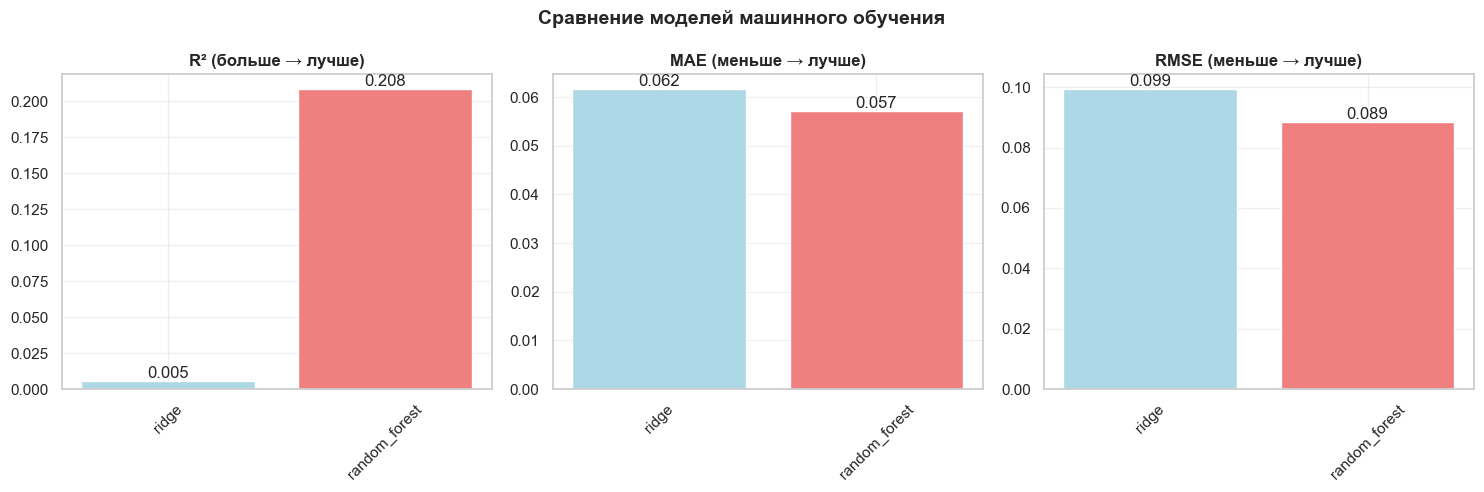

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0054 | MAE =  0.0616 | RMSE =  0.0993
   random_forest   | R² =  0.2085 | MAE =  0.0571 | RMSE =  0.0886

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2085)

🔬 Тестируем набор: 2
   Признаки: ['cross_sectional_area', 'component_type_id', 'nominal_thickness_mmc', 'h2s_content', 'operating_temperature', 'operating_pressure', 'water_content']


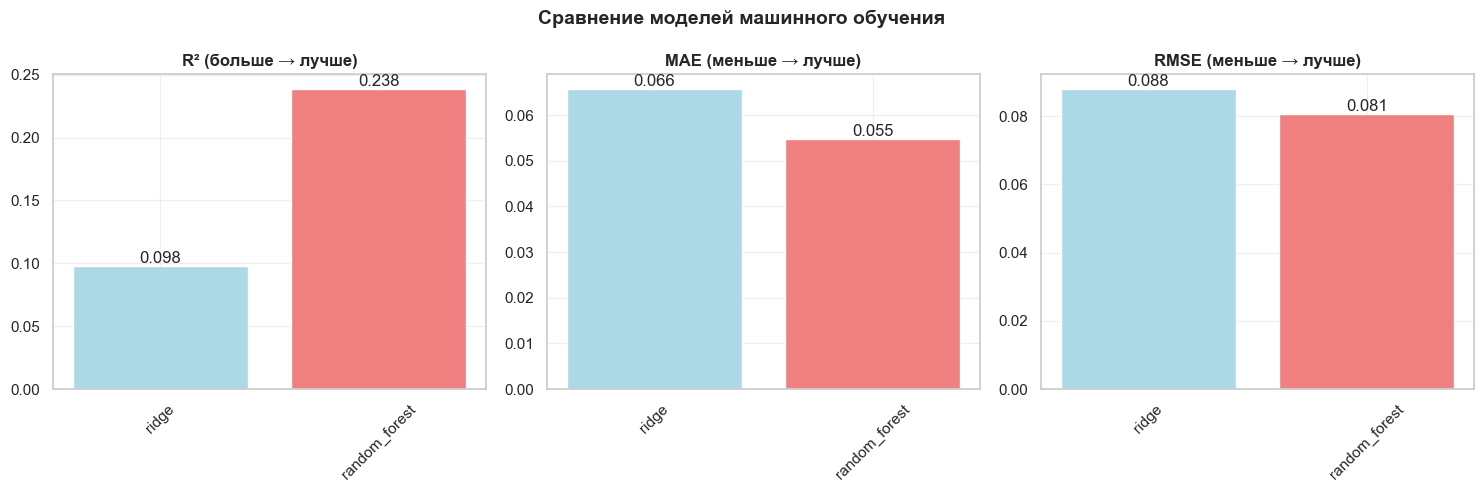

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0978 | MAE =  0.0656 | RMSE =  0.0878
   random_forest   | R² =  0.2383 | MAE =  0.0548 | RMSE =  0.0807

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2383)

🔬 Тестируем набор: 3
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years']


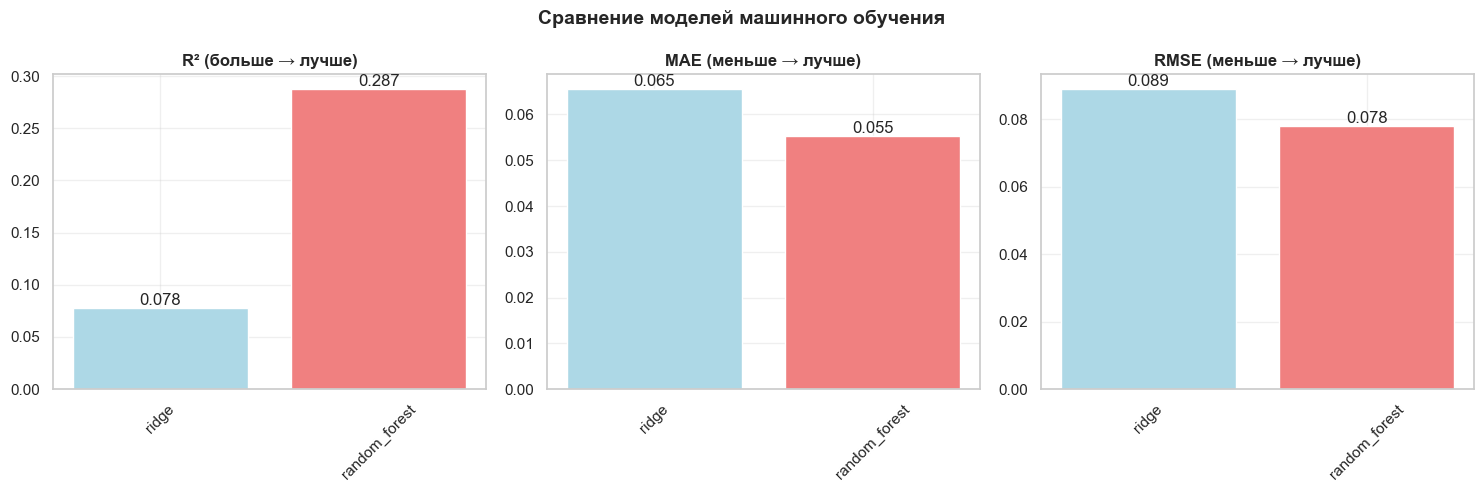

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0777 | MAE =  0.0655 | RMSE =  0.0888
   random_forest   | R² =  0.2874 | MAE =  0.0554 | RMSE =  0.0781

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2874)

🔬 Тестируем набор: 4
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


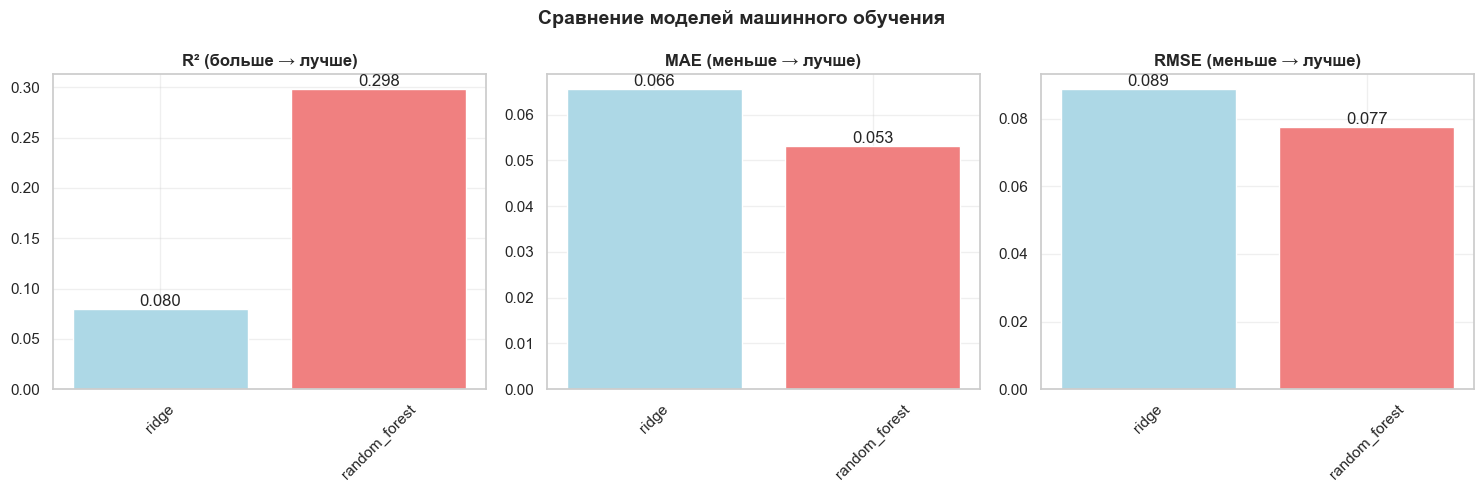

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0801 | MAE =  0.0655 | RMSE =  0.0887
   random_forest   | R² =  0.2980 | MAE =  0.0532 | RMSE =  0.0775

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2980)

🔬 Тестируем набор: 5
   Признаки: ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


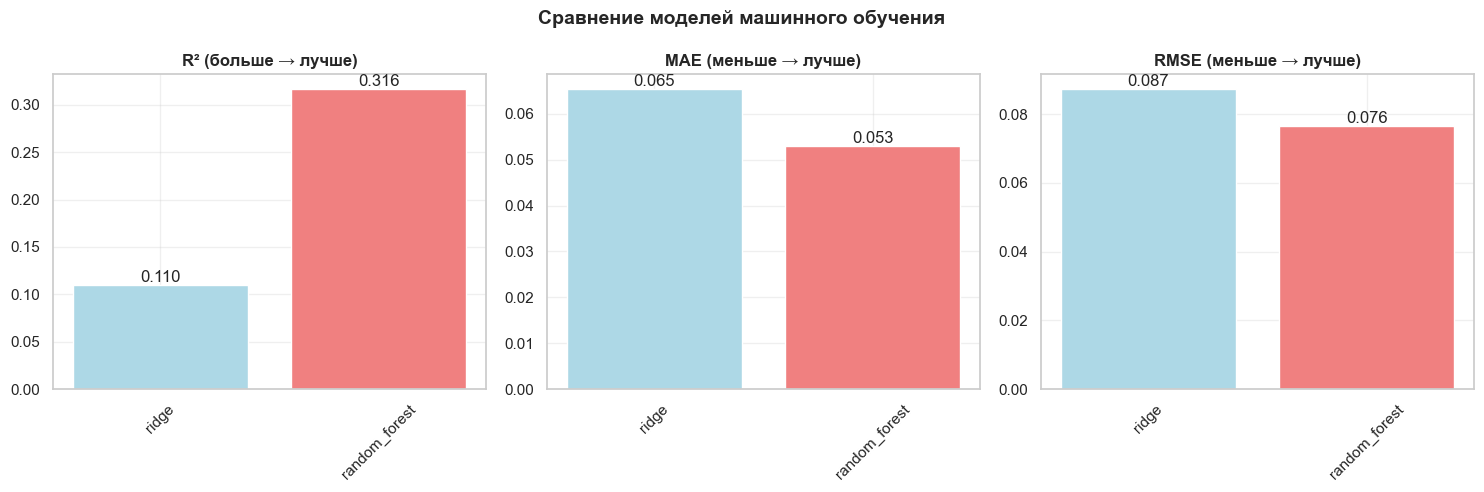

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1103 | MAE =  0.0653 | RMSE =  0.0872
   random_forest   | R² =  0.3162 | MAE =  0.0529 | RMSE =  0.0765

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3162)

🔬 Тестируем набор: 6
   Признаки: ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


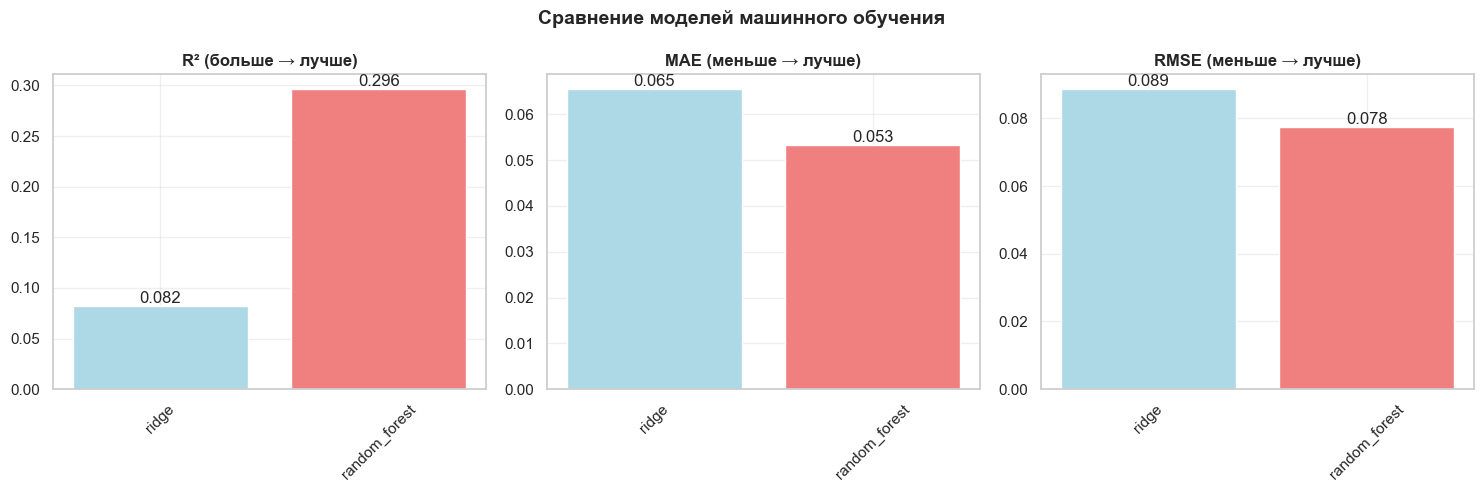

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0817 | MAE =  0.0655 | RMSE =  0.0886
   random_forest   | R² =  0.2962 | MAE =  0.0533 | RMSE =  0.0776

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2962)


<Figure size 1200x600 with 0 Axes>

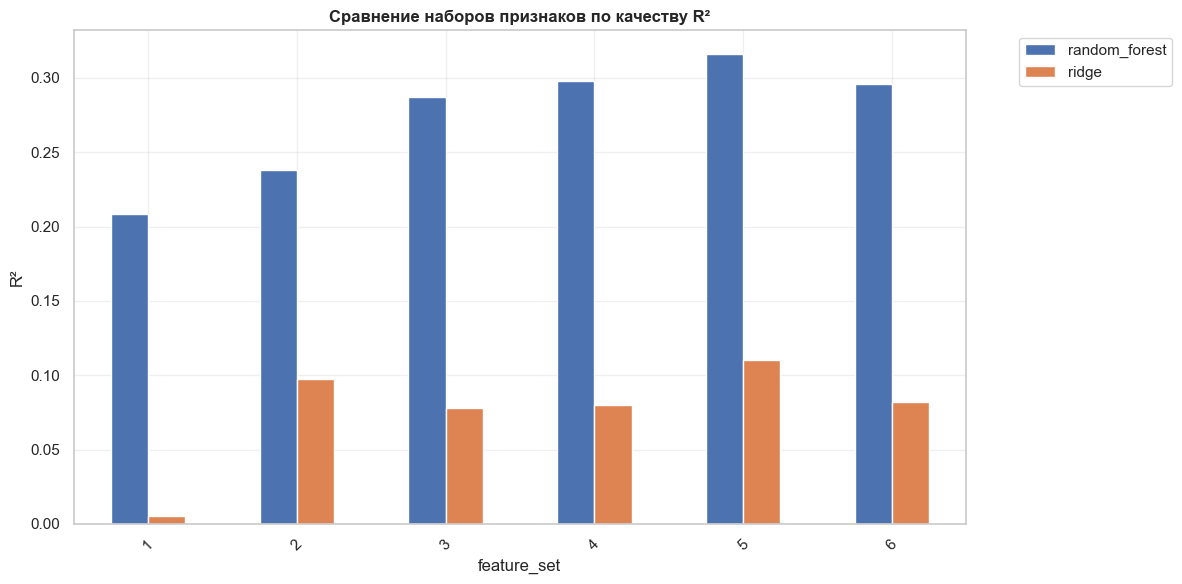

In [19]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '1': ['operating_temperature', 'operating_pressure', 'material_resistance_score'],
    '2': ['cross_sectional_area','component_type_id','nominal_thickness_mmc','h2s_content','operating_temperature','operating_pressure','water_content'],
    '3': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years'],
    '4': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '5': ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '6': ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
}

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: 5
   Признаки: ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


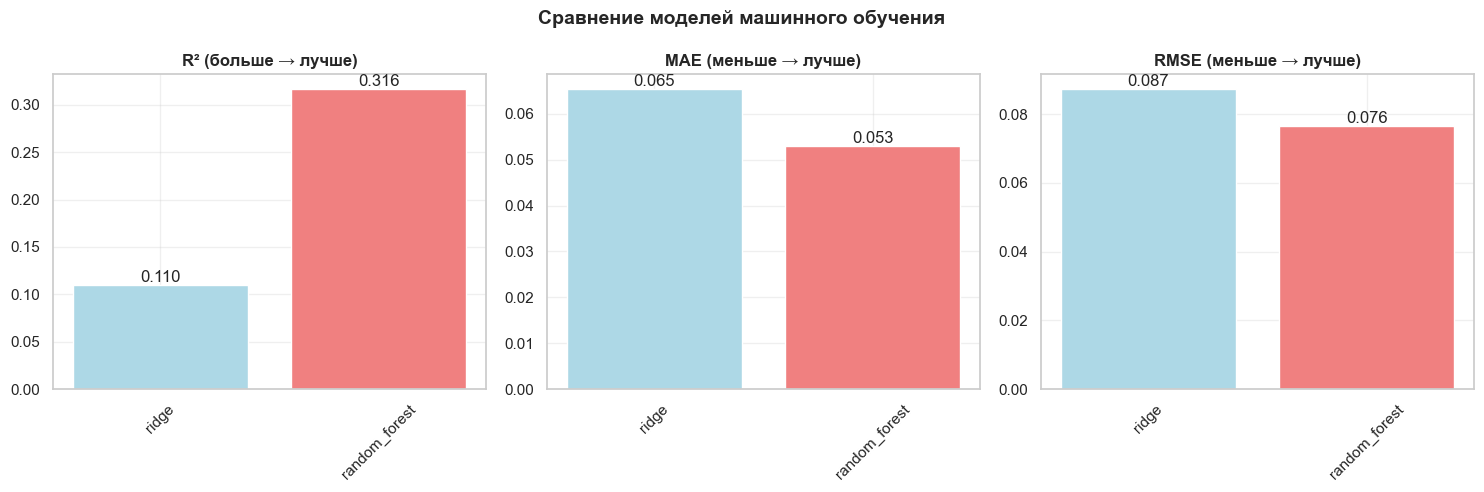

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1103 | MAE =  0.0653 | RMSE =  0.0872
   random_forest   | R² =  0.3162 | MAE =  0.0529 | RMSE =  0.0765

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3162)

🔬 Тестируем набор: 6
   Признаки: ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


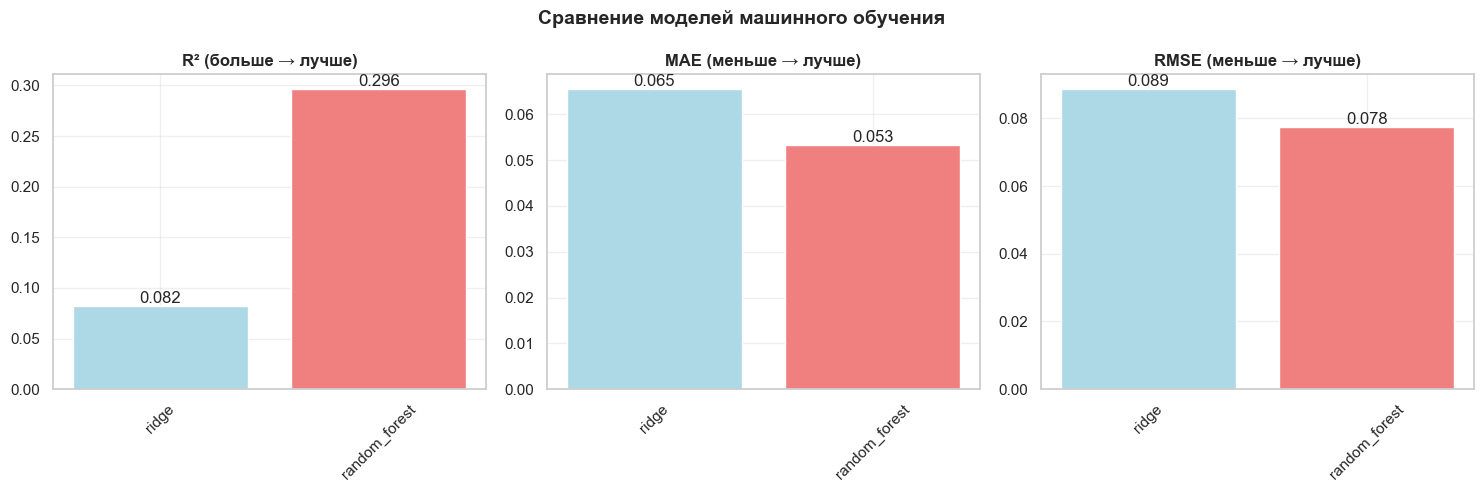

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0817 | MAE =  0.0655 | RMSE =  0.0886
   random_forest   | R² =  0.2962 | MAE =  0.0533 | RMSE =  0.0776

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2962)

🔬 Тестируем набор: 7
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


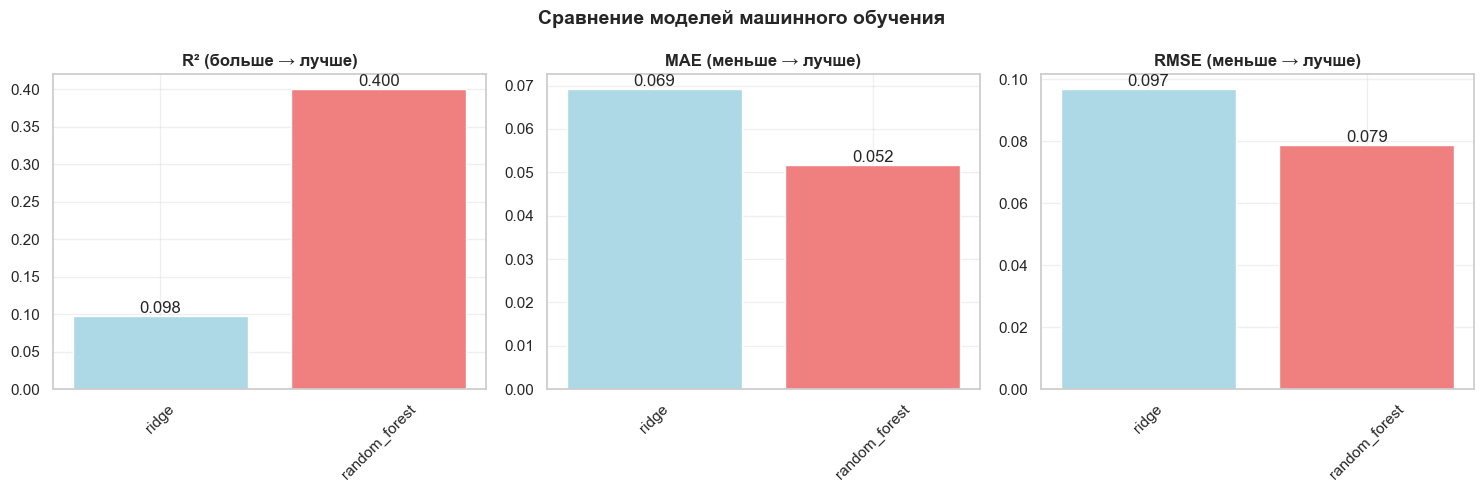

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0977 | MAE =  0.0691 | RMSE =  0.0967
   random_forest   | R² =  0.3997 | MAE =  0.0518 | RMSE =  0.0789

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3997)


<Figure size 1200x600 with 0 Axes>

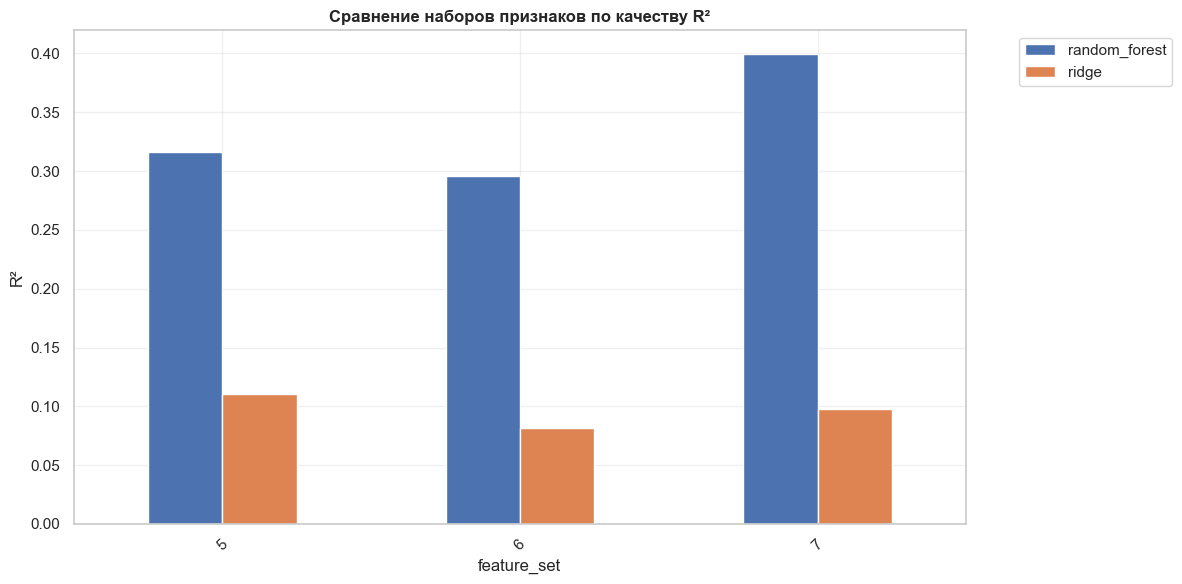

In [21]:
# 6. Сравнение разных наборов признаков
feature_sets = {
    '5': ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '6': ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '7': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],

}

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: 7
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


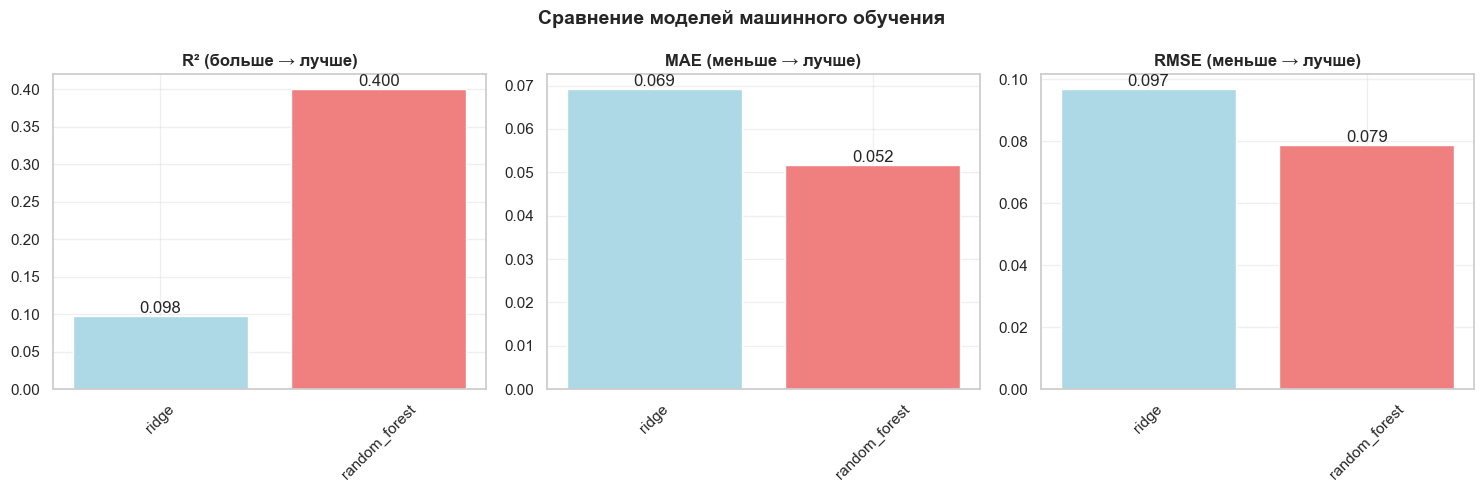

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0977 | MAE =  0.0691 | RMSE =  0.0967
   random_forest   | R² =  0.3997 | MAE =  0.0518 | RMSE =  0.0789

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3997)

🔬 Тестируем набор: 8
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'stress_corrosion_index']


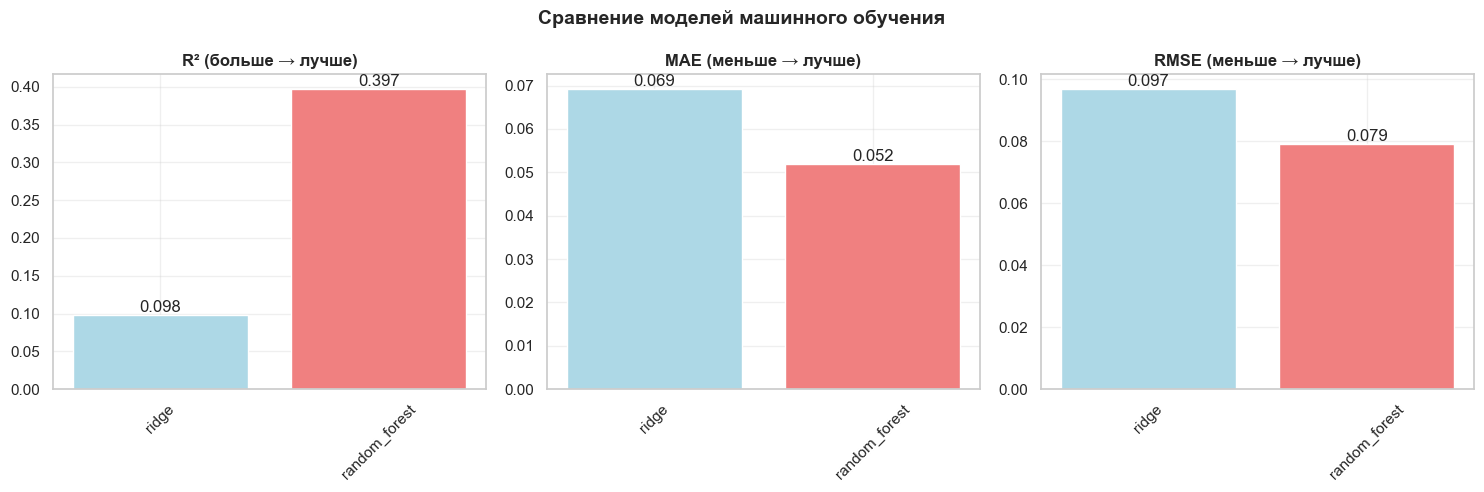

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0977 | MAE =  0.0691 | RMSE =  0.0967
   random_forest   | R² =  0.3966 | MAE =  0.0519 | RMSE =  0.0791

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3966)

🔬 Тестируем набор: 9
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'underdeposit_corrosion_index']


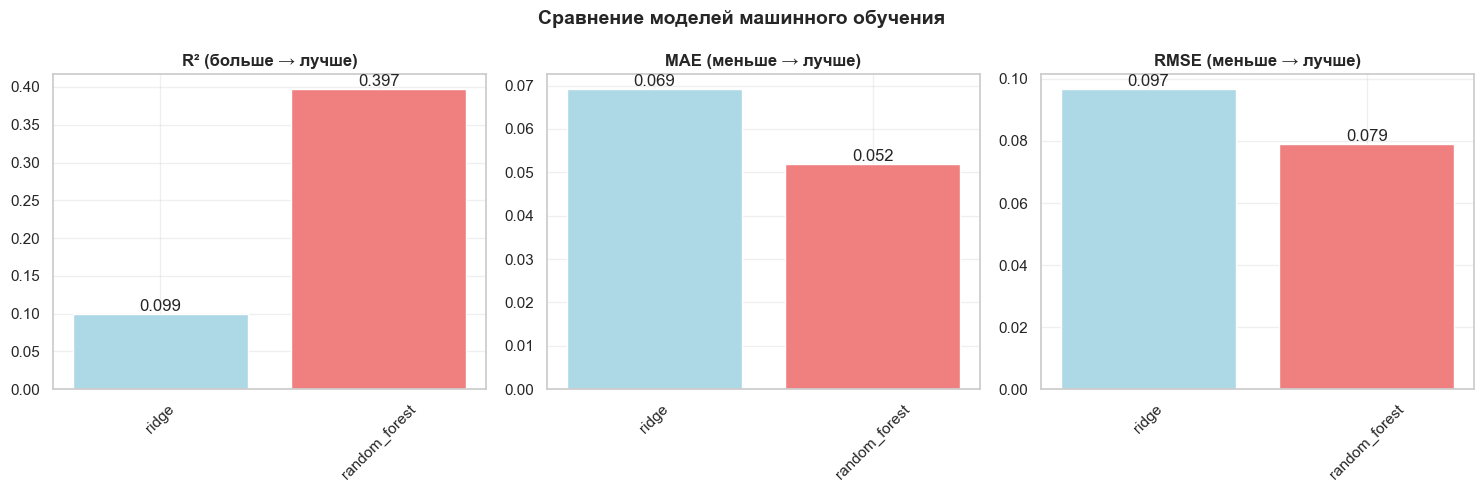

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0990 | MAE =  0.0691 | RMSE =  0.0966
   random_forest   | R² =  0.3969 | MAE =  0.0519 | RMSE =  0.0791

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3969)


<Figure size 1200x600 with 0 Axes>

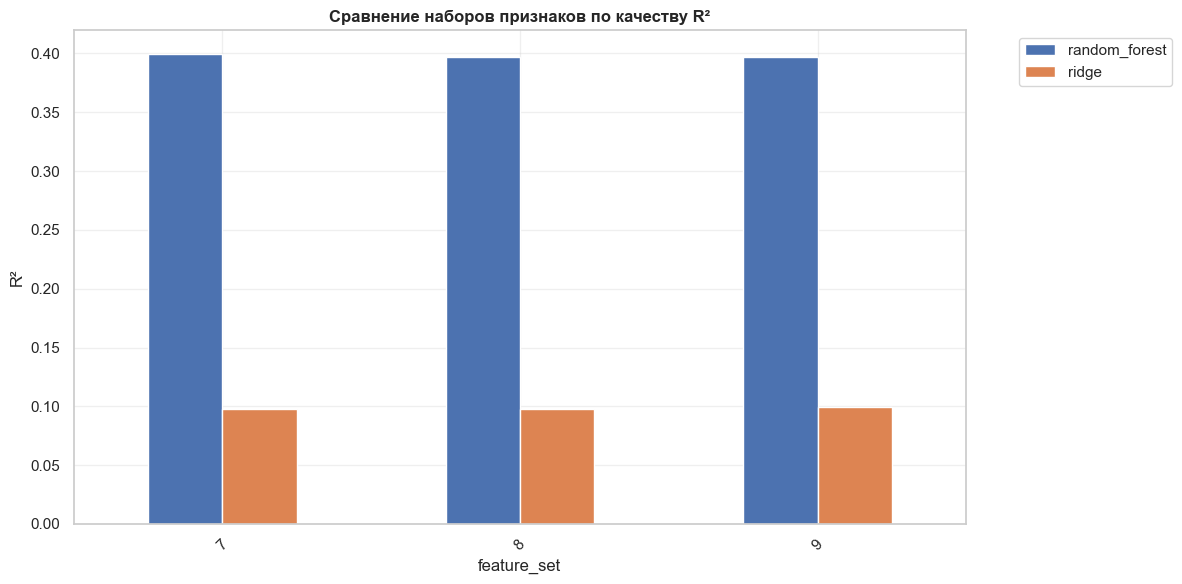

In [24]:
# 6. Сравнение разных наборов признаков
feature_sets = {
    '7': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '8': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','stress_corrosion_index'],
    '9': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'], 
}


comparison = analyzer.compare_feature_sets(feature_sets)

Данные: 143,060 строк, 45 колонок
Колонки:
['ammonia_content', 'avg_corrosion_rate_mm_per_year', 'chloride_aggressiveness', 'chlorine_content', 'co2_content', 'component_type_id', 'component_type_name', 'contour', 'corrosion_aggressiveness_index', 'corrosion_inhibitor_content', 'corrosion_protection_index', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'equipment', 'equipment_age_years', 'h2s_aggressiveness_index', 'h2s_content', 'h2s_water_ratio', 'hydrochloric_acid_content', 'inner_diameter', 'installation', 'material_code', 'material_resistance_score', 'material_type', 'measurement_date', 'measurement_points_in_section', 'min_corrosion_rate_mm_per_year', 'nominal_thickness_mmc', 'operating_pressure', 'operating_temperature', 'outer_diameter', 'oxygen_content', 'pitting_corrosion_index', 'section_number', 'stress_corrosion_index', 'tmin_mmc', 'total_acidity_index', 'total_acids', 'total_chlorine_compounds', 'total_sulfur_compounds', 'underdeposit_corrosion_index', 'wall_thic